In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# matplotlib 한글 깨짐 해결
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [4]:
path = '../data/연간자료(지출, 2019~) - 전체가구_1인이상/2019_연간자료(지출, 2019~) - 전체가구_1인이상_20240426_97622.csv'
pd.read_csv(path, encoding='cp949')


C:\Users\rladn\AppData\Local\Temp\ipykernel_7396\4050840898.py:2: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(path, encoding='cp949')


,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,...,가계지출_소비지출_기타상품서비스_기타서비스금액구입비,가계지출_비소비지출금액,가계지출_비소비지출_경상조세,가계지출_비소비지출_비경상조세,가계지출_비소비지출_연금기여금,가계지출_비소비지출_사회보장구입비,가계지출_비소비지출_이자비용,가계지출_비소비지출_가구간이전지출금액,가계지출_비소비지출_비영리단체이전지출금액,도시읍면부구분코드
0,201900,1,2,1,0,0,0,0,1,1,...,0,99416,0,15190,0,0,4893,50000,29333,1
1,201900,2,1,3,2,0,0,0,1,2,...,3333,316357,37697,0,0,110160,0,142500,26000,1
2,201900,3,2,1,0,0,0,0,1,1,...,0,9206,0,0,4050,3728,0,0,1429,1
3,201900,4,1,3,2,0,0,1,0,2,...,0,445731,71766,0,245393,104001,4857,7143,12571,1
4,201900,5,1,1,1,0,0,0,1,1,...,525514,359537,13844,0,65571,50121,0,57143,172857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,201900,9506,2,4,2,0,0,1,0,2,...,0,1538751,95328,0,8370,142911,1075742,55000,161400,0
9506,201900,9507,2,4,3,0,0,1,0,2,...,0,685210,8298,0,0,47612,422300,181000,26000,0
9507,201900,9508,2,5,3,0,0,1,0,3,...,0,1459269,96528,0,174473,72436,304014,640909,170909,0
9508,201900,9509,1,1,1,0,0,0,1,1,...,454545,117633,24609,0,0,26887,0,65227,909,0


In [5]:
data = pd.read_csv(path, encoding='cp949')

C:\Users\rladn\AppData\Local\Temp\ipykernel_7396\1841423156.py:1: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, encoding='cp949')


In [6]:
## [데이터 필요한 행만 전처리] 

data.rename(columns={
    '가계지출금액': '전체소비지출',
    '가계지출_소비지출금액': '소비지출',
    '가계지출_소비지출_식료품비주류음료구입비': '식료품음료구입',
    '가계지출_소비지출_식료품비주류음료_곡물구입비': '식료품_곡물구입',
    '가계지출_소비지출_식료품비주류음료_곡물가공품구입비': '식료품_곡물가공품구입',
    '가계지출_소비지출_식료품비주류음료_빵떡류구입비': '식료품_빵떡류구입',
    '가계지출_소비지출_식료품비주류음료_육류구입비': '식료품_육류구입',
    '가계지출_소비지출_식료품비주류음료_육류가공품구입비': '식료품_육류가공품구입',
    '가계지출_소비지출_식료품비주류음료_신선수산동물구입비': '식료품_신선수산동물구입',
    '가계지출_소비지출_식료품비주류음료_염건수산동물구입비': '식료품_염건수산동물구입',
    '가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비': '식료품_기타수산동물가공구입',
    '가계지출_소비지출_식료품비주류음료_유제품및알구입비': '식료품_유제품알구입',
    '가계지출_소비지출_식료품비주류음료_유지류구입비': '식료품_유지류구입',
    '가계지출_소비지출_식료품비주류음료_과일가공품구입비': '식료품_과일가공품구입',
    '가계지출_소비지출_식료품비주류음료_채소가공품구입비': '식료품_채소가공품구입',
    '가계지출_소비지출_식료품비주류음료_해조가공품구입비': '식료품_해조가공품구입',
    '가계지출_소비지출_식료품비주류음료_당류과자류구입비': '식료품_당류과자류구입',
    '가계지출_소비지출_식료품비주류음료_조미식품구입비': '식료품_조미식품구입',
    '가계지출_소비지출_식료품비주류음료_기타식품구입비': '식료품_기타식품구입',
    '가계지출_소비지출_식료품비주류음료_커피차구입비': '식료품_커피차구입',
    '가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비': '식료품_쥬스음료구입',
    '가계지출_소비지출_주류담배구입비': '주류담배구입',
    '가계지출_소비지출_주류담배_주류구입비': '주류구입',
    '가계지출_소비지출_주류담배_담배구입비': '담배구입',
    '가계지출_소비지출_의류신발구입비': '의류신발구입',
    '가계지출_소비지출_의류신발_직물및외의구입비': '의류신발_직물및외의구입',
    '가계지출_소비지출_의류신발_내의구입비': '의류신발_내의구입',
    '가계지출_소비지출_의류신발_기타의복구입비': '의류신발_기타의복구입',
    '가계지출_소비지출_의류신발_의복관련서비스구입비': '의류신발_의복관련서비스구입',
    '가계지출_소비지출_의류신발_신발구입비': '의류신발_신발구입',
    '가계지출_소비지출_의류신발_신발서비스구입비': '의류신발_신발서비스구입',
    '가계지출_소비지출_주거수도광열비': '주거수도광열비',
    '가계지출_소비지출_주거수도광열_실제주거비구입비': '주거수도광열_실제주거비구입',
    '가계지출_소비지출_주거수도광열_주택유지수선구입비': '주거수도광열_주택유지수선구입',
    '가계지출_소비지출_주거수도광열_상하수도폐기물처리비': '주거수도광열_상하수도폐기물처리',
    '가계지출_소비지출_주거수도광열_기타주거관련서비스구입비': '주거수도광열_기타주거관련서비스구입',
    '가계지출_소비지출_주거수도광열_연료비구입비': '주거수도광열_연료비구입',
    '가계지출_소비지출_가정용품가사서비스이용금액': '가정용품가사서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가구조명구입비': '가정용품가사서비스_가구조명구입',
    '가계지출_소비지출_가정용품가사서비스_실내장식구입비': '가정용품가사서비스_실내장식구입',
    '가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액': '가정용품가사서비스_가구조명장식서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가정용섬유구입비': '가정용품가사서비스_가정용섬유구입',
    '가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비': '가정용품가사서비스_가전가정용기기구입',
    '가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액': '가정용품가사서비스_가전관련서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가사용품구입비': '가정용품가사서비스_가사용품구입',
    '가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비': '가정용품가사서비스_가정용공구기타구입',
    '가계지출_소비지출_가정용품가사서비스_가사소모품구입비': '가정용품가사서비스_가사소모품구입',
    '가계지출_소비지출_가정용품가사서비스_가사서비스금액': '가정용품가사서비스_가사서비스',
    '가계지출_소비지출_보건제품구입비': '보건제품구입',
    '가계지출_소비지출_보건_의약품구입비': '보건_의약품구입',
    '가계지출_소비지출_보건_의료용소모품구입비': '보건_의료용소모품구입',
    '가계지출_소비지출_보건_보건의료용품기구구입비': '보건_보건의료용품기구구입',
    '가계지출_소비지출_보건_외래의료서비스이용금액': '보건_외래의료서비스이용',
    '가계지출_소비지출_보건_치과서비스이용금액': '보건_치과서비스이용',
    '가계지출_소비지출_보건_기타의료서비스이용금액': '보건_기타의료서비스이용',
    '가계지출_소비지출_보건_입원서비스이용금액': '보건_입원서비스이용',
    '가계지출_소비지출_교통비': '교통비',
    '가계지출_소비지출_교통_자동차구입비': '교통_자동차구입',
    '가계지출_소비지출_교통_기타운송기구구입비': '교통_기타운송기구구입',
    '가계지출_소비지출_교통_운송기구유지수리비': '교통_운송기구유지수리',
    '가계지출_소비지출_교통_운송기구연료비': '교통_운송기구연료',
    '가계지출_소비지출_교통_기타개인교통서비스이용금액': '교통_기타개인교통서비스이용',
    '가계지출_소비지출_교통_철도운송금액': '교통_철도운송',
    '가계지출_소비지출_교통_육상운송금액': '교통_육상운송',
    '가계지출_소비지출_교통_기타운송금액': '교통_기타운송',
    '가계지출_소비지출_교통_기타교통관련서비스이용금액': '교통_기타교통관련서비스이용',
    '가계지출_소비지출_통신비': '통신비',
    '가계지출_소비지출_통신_우편서비스이용금액': '통신_우편서비스이용',
    '가계지출_소비지출_통신_통신장비구입비': '통신_통신장비구입',
    '가계지출_소비지출_통신_통신서비스이용금액': '통신_통신서비스이용',
    '가계지출_소비지출_오락문화비': '오락문화비',
    '가계지출_소비지출_오락문화_영상음향기기구입비': '오락문화_영상음향기기구입',
    '가계지출_소비지출_오락문화_사진광학장비구입비': '오락문화_사진광학장비구입',
    '가계지출_소비지출_오락문화_정보처리장치구입비': '오락문화_정보처리장치구입',
    '가계지출_소비지출_오락문화_기록매체구입비': '오락문화_기록매체구입',
    '가계지출_소비지출_오락문화_영상음향정보기기수리비': '오락문화_영상음향정보기기수리',
    '가계지출_소비지출_오락문화_내구재구입비': '오락문화_내구재구입',
    '가계지출_소비지출_오락문화_악기기구구입비': '오락문화_악기기구구입',
    '가계지출_소비지출_오락문화_오락문화내구재유지수리비': '오락문화_오락문화내구재유지수리',
    '가계지출_소비지출_오락문화_장난감취미용품구입비': '오락문화_장난감취미용품구입',
    '가계지출_소비지출_오락문화_캠핑운동관련용품구입비': '오락문화_캠핑운동관련용품구입',
    '가계지출_소비지출_오락문화_화훼관련용품구입비': '오락문화_화훼관련용품구입',
    '가계지출_소비지출_오락문화_애완동물관련물품구입비': '애완동물_물품구입',
    '가계지출_소비지출_오락문화_화훼애완동물서비스이용금액': '애완동물_서비스이용',
    '가계지출_소비지출_오락문화_운동오락서비스이용금액': '운동오락_서비스이용',
    '가계지출_소비지출_오락문화_문화서비스이용금액': '문화_서비스이용',
    '가계지출_소비지출_오락문화_복권구입비': '복권_구입비',
    '가계지출_소비지출_오락문화_서적구입비': '서적_구입비',
    '가계지출_소비지출_오락문화_기타인쇄물구입비': '인쇄물_구입비',
    '가계지출_소비지출_오락문화_문구구입비': '문구_구입비',
    '가계지출_소비지출_오락문화_단체여행경비': '단체여행_경비',
    '가계지출_소비지출_교육비': '교육비',
    '가계지출_소비지출_교육_정규교육비': '정규교육비',
    '가계지출_소비지출_교육_초등교육비': '초등교육비',
    '가계지출_소비지출_교육_중등교육비': '중등교육비',
    '가계지출_소비지출_교육_고등교육비': '고등교육비',
    '가계지출_소비지출_교육_학원보습교육비': '학원보습교육비',
    '가계지출_소비지출_교육_학생학원교육비': '학생학원교육비',
    '가계지출_소비지출_교육_성인학원비': '성인학원비',
    '가계지출_소비지출_교육_기타교육비': '기타교육비',
    '가계지출_소비지출_음식숙박비': '음식숙박비',
    '가계지출_소비지출_음식숙박_식대': '식대',
    '가계지출_소비지출_음식숙박_숙박비': '숙박비',
    '가계지출_소비지출_기타상품서비스이용금액' : '기타상품서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용서비스이용금액': '이미용서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용기기구입비': '이미용기기구입',
    '가계지출_소비지출_기타상품서비스_위생이미용용품구입비': '위생이미용용품구입',
    '가계지출_소비지출_기타상품서비스_시계장신구구입비': '시계장신구구입',
    '가계지출_소비지출_기타상품서비스_기타개인용품구입비': '기타개인용품구입',
    '가계지출_소비지출_기타상품서비스_복지시설비용금액': '복지시설비용',
    '가계지출_소비지출_기타상품서비스_보험료': '보험료',
    '가계지출_소비지출_기타상품서비스_기타금융구입비': '기타금융구입',
    '가계지출_소비지출_기타상품서비스_기타서비스금액구입비' : '기타서비스금액구입',
    '가계지출_비소비지출금액': '비소비지출금액',
    '가계지출_비소비지출_경상조세': '경상조세',
    '가계지출_비소비지출_비경상조세': '비경상조세',
    '가계지출_비소비지출_연금기여금': '연금기여금',
    '가계지출_비소비지출_사회보장구입비': '사회보장구입비',
    '가계지출_비소비지출_이자비용': '이자비용',
    '가계지출_비소비지출_가구간이전지출금액': '가구간이전지출금액',
    '가계지출_비소비지출_비영리단체이전지출금액': '비영리단체이전지출금액'
}, inplace=True)


In [7]:
# 행 전처리

data = data[['조사연월', '가구일련번호', '가구구분코드', '가구원수', '취업인원수', '노인가구여부', '배우자코드', '가구주_성별코드', '가구주_연령', '가구주_취업여부', '거처구분코드', '자동차보유대수',
           '입주형태코드', '월세평가금액', '전세보증금', '소득구간코드', '전체소비지출', '소비지출', '식료품음료구입', '식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
           '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', '식료품_유지류구입', '식료품_과일가공품구입',
           '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입', '주류담배구입',
           '주류구입', '담배구입', '의류신발구입', '의류신발_직물및외의구입', '의류신발_내의구입', '의류신발_기타의복구입', '의류신발_의복관련서비스구입', '의류신발_신발구입', '의류신발_신발서비스구입',
           '주거수도광열비', '주거수도광열_실제주거비구입', '주거수도광열_주택유지수선구입', '주거수도광열_상하수도폐기물처리', '주거수도광열_기타주거관련서비스구입', '주거수도광열_연료비구입', 
           '가정용품가사서비스이용', '가정용품가사서비스_가구조명구입', '가정용품가사서비스_실내장식구입', '가정용품가사서비스_가구조명장식서비스이용', '가정용품가사서비스_가정용섬유구입',
           '가정용품가사서비스_가전가정용기기구입', '가정용품가사서비스_가전관련서비스이용', '가정용품가사서비스_가사용품구입', '가정용품가사서비스_가정용공구기타구입', '가정용품가사서비스_가사소모품구입',
           '가정용품가사서비스_가사서비스', '보건제품구입', '보건_의약품구입', '보건_의료용소모품구입', '보건_보건의료용품기구구입', '보건_외래의료서비스이용', '보건_치과서비스이용', '보건_기타의료서비스이용',
           '보건_입원서비스이용', '교통비', '교통_자동차구입', '교통_기타운송기구구입', '교통_운송기구유지수리', '교통_운송기구연료', '교통_기타개인교통서비스이용', '교통_철도운송', '교통_육상운송',
           '교통_기타운송', '교통_기타교통관련서비스이용', '통신비', '통신_우편서비스이용', '통신_통신장비구입', '통신_통신서비스이용', '오락문화비', '오락문화_영상음향기기구입', '오락문화_사진광학장비구입',
           '오락문화_정보처리장치구입', '오락문화_기록매체구입', '오락문화_영상음향정보기기수리', '오락문화_내구재구입', '오락문화_악기기구구입', '오락문화_오락문화내구재유지수리', '오락문화_장난감취미용품구입',
           '오락문화_캠핑운동관련용품구입', '오락문화_화훼관련용품구입', '애완동물_물품구입', '애완동물_서비스이용', '운동오락_서비스이용', '문화_서비스이용', '복권_구입비', '서적_구입비', '인쇄물_구입비', 
           '문구_구입비', '단체여행_경비', '교육비', '정규교육비', '초등교육비', '중등교육비', '고등교육비', '학원보습교육비', '학생학원교육비', '성인학원비', '기타교육비', '음식숙박비', '식대', '숙박비',
           '기타상품서비스이용', '이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입', '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입', '비소비지출금액',
           '비경상조세', '비경상조세', '연금기여금', '사회보장구입비', '이자비용', '가구간이전지출금액', '비영리단체이전지출금액', '도시읍면부구분코드']]


In [8]:
df = pd.DataFrame(data)

df.head()

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,배우자코드,가구주_성별코드,가구주_연령,가구주_취업여부,...,기타서비스금액구입,비소비지출금액,비경상조세,비경상조세,연금기여금,사회보장구입비,이자비용,가구간이전지출금액,비영리단체이전지출금액,도시읍면부구분코드
0,201900,1,2,1,0,0,2,2,64,2,...,0,99416,15190,15190,0,0,4893,50000,29333,1
1,201900,2,1,3,2,0,1,1,63,1,...,3333,316357,0,0,0,110160,0,142500,26000,1
2,201900,3,2,1,0,0,3,1,58,2,...,0,9206,0,0,4050,3728,0,0,1429,1
3,201900,4,1,3,2,0,1,1,29,1,...,0,445731,0,0,245393,104001,4857,7143,12571,1
4,201900,5,1,1,1,0,3,2,58,1,...,525514,359537,0,0,65571,50121,0,57143,172857,1


In [9]:
df.shape

(9510, 138)

전체 가구 성별 확인

In [10]:
#성별 값 전처리
df['가구주_성별코드'] = df['가구주_성별코드'].replace({1:'남성', 2:'여성'})
gender = df['가구주_성별코드']
pd.DataFrame(gender)

,가구주_성별코드
0,여성
1,남성
2,남성
3,남성
4,여성
...,...
9505,남성
9506,남성
9507,남성
9508,남성


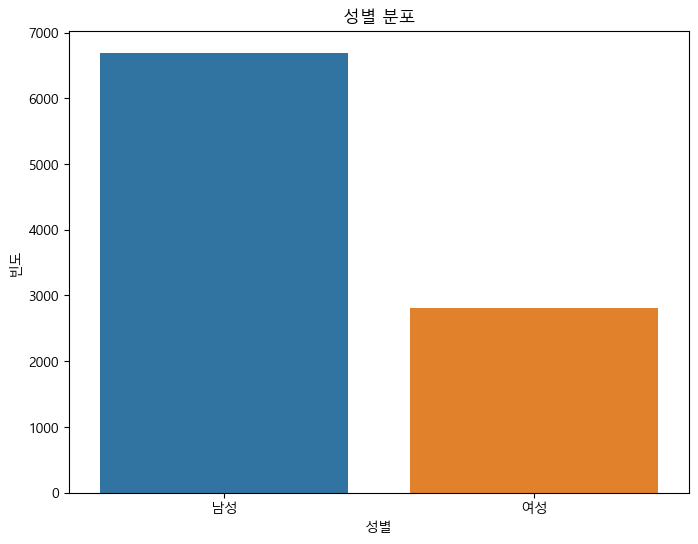

In [11]:
# 성별 별 빈도수 계산
gender_counts = df['가구주_성별코드'].value_counts()

# 성별 비율 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('빈도')
plt.show()

1인 가구 성별 확인

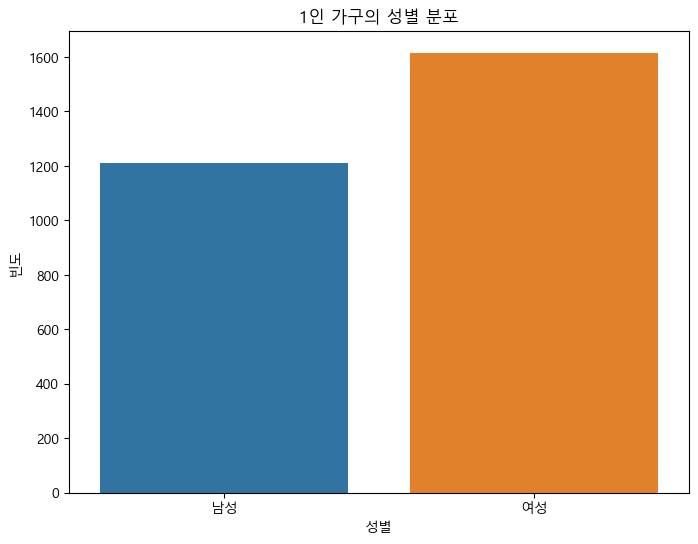

In [12]:
# '가구원수'==1 조건 필터링
df_single = df[df['가구원수'] == 1]

# 성별 별 빈도수 계산
gender_counts_1 = df_single['가구주_성별코드'].value_counts()

# 성별 값의 순서 지정 (전체가구 성별에서 나온 결과값과 비슷하게 하려고 추가함)
ordered_gender_counts_1 = gender_counts_1.reindex(['남성', '여성'])

# 성별 비율 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x=ordered_gender_counts_1.index, y=ordered_gender_counts_1.values)
plt.title('1인 가구의 성별 분포')
plt.xlabel('성별')
plt.ylabel('빈도')
plt.show()

전체가구 연령별 확인

In [13]:
def age(가구주_연령):
    if 20 <= 가구주_연령 < 30:
        return '20대'
    elif 30 <= 가구주_연령 < 40:
        return '30대'
    elif 40 <= 가구주_연령 < 50:
        return '40대'
    elif 50 <= 가구주_연령 < 60:
        return '50대'
    elif 60 <= 가구주_연령 < 70:
        return '60대'
    elif 가구주_연령 >= 70:
        return '70대 이상'
    else:
        return None  # 20세 미만은 None으로 처리

# 데이터 연령대별 구분
df.loc[:, '연령대'] = df['가구주_연령'].apply(age)
print(df['연령대'])

0          60대
1          60대
2          50대
3          20대
4          50대
         ...  
9505       30대
9506       50대
9507       60대
9508       60대
9509    70대 이상
Name: 연령대, Length: 9510, dtype: object


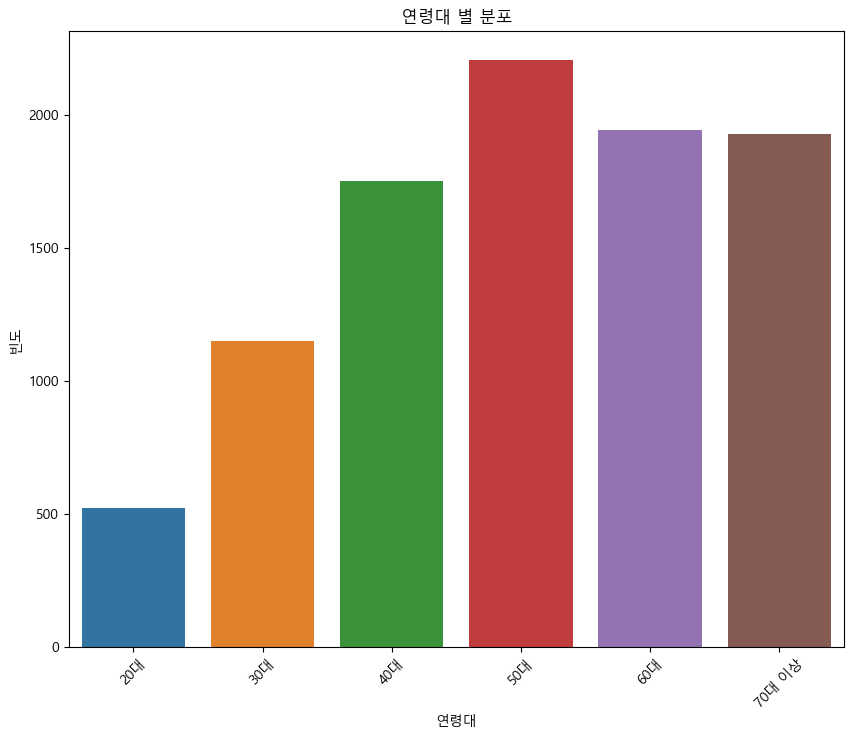

In [14]:
# 연령대 별 빈도수 계산
age_counts = df['연령대'].value_counts().sort_index()

# 연령대 분포 그래프 그리기
plt.figure(figsize=(10, 8))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('연령대 별 분포')
plt.xlabel('연령대')
plt.ylabel('빈도')
plt.xticks(rotation=45)  # 연령대 레이블을 45도 각도로 회전
plt.show()


1인 가구 연령별 확인

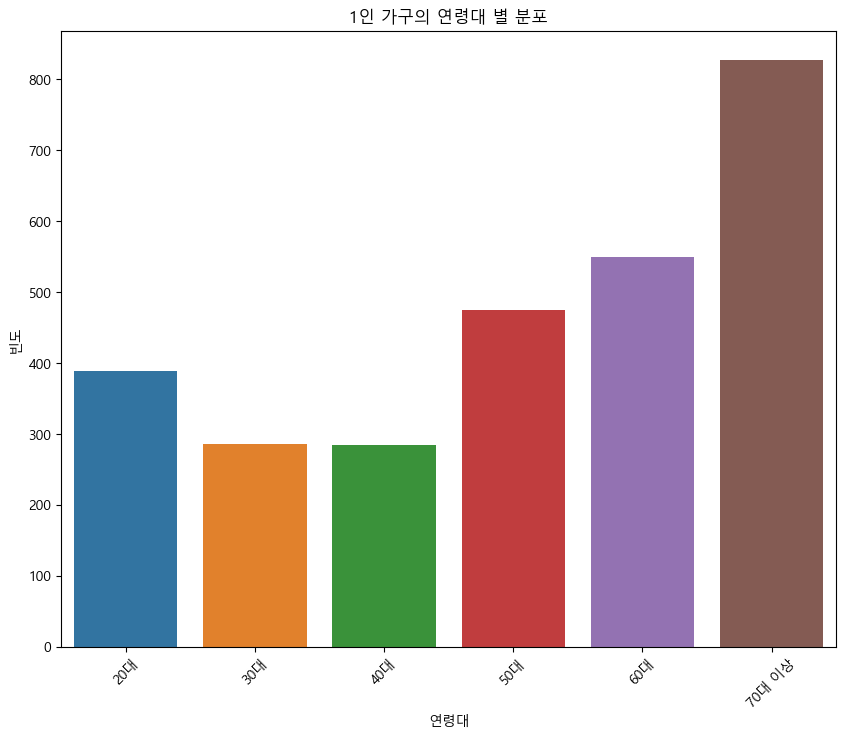

In [15]:
# '가구원수' == 1 조건에 맞는 데이터 필터링
df_single = df[df['가구원수'] == 1]

# 필터링된 데이터에서 연령대 별 빈도수 계산 및 인덱스로 정렬
age_counts_single = df_single['연령대'].value_counts().sort_index()

# 연령대 별 분포 그래프 그리기
plt.figure(figsize=(10, 8))
sns.barplot(x=age_counts_single.index, y=age_counts_single.values)
plt.title('1인 가구의 연령대 별 분포')
plt.xlabel('연령대')
plt.ylabel('빈도')
plt.xticks(rotation=45)  # 연령대 레이블을 45도 각도로 회전
plt.show()


In [16]:
# 코드 replace (데어터셋 설명 참고)

#가구주_ 취업여부 값변경 (1,2) --> 취업,비취업
df['가구주_취업여부'] = df['가구주_취업여부'].replace({1: '취업', 2 : '비취업 '})

#배우자코드 값변경 1,2,3 --> 있음,있음(비동거), 없음 
df['배우자코드'] = df['배우자코드'].replace({1: '있음(동거)', 2 : '있음(비동거)', 3: '없음'})

#가구구분코드 1,2 --> 근로자가구, 근로자외 가구 
df['가구구분코드'] = df['가구구분코드'].replace({1: '근로자가구', 2 : '근로자외가구'})

#노인가구여부 0,1 --> 아님. 해당 
df['노인가구여부'] = df['노인가구여부'].replace({0: '아님', 1 : '해당'})

#가구주_취업여부 (1:'취업', 2:'비취업')
df['가구주_취업여부'] = df['가구주_취업여부'].replace({1:'취업', 2:'비취업'})

#거처구분코드 :
#(1:'단독주택(다가구주택 포함)',2:'아파트',3:'연립주택',4:'다세대주택',5:'비거주용건물',6:'오피스텔',7:'기타')
df['거처구분코드'] = df['거처구분코드'].replace({1:'단독주택(다가구주택 포함)',2:'아파트',3:'연립주택',4:'다세대주택',5:'비거주용건물',6:'오피스텔',7:'기타'})

#입주형태코드 (1:'자기집',2:'무상주택',3:'사택',4:'전세',5:'영구임대',6:'보증부월세',7:'보증금 없는 월세')
df['입주형태코드'] = df['입주형태코드'].replace({1:'자기집',2:'무상주택',3:'사택',4:'전세',5:'영구임대',6:'보증부월세',7:'보증금 없는 월세'})

#소득구간코드 :
#(1:'100만원 미만', 2:'100~200만원 미만',3:'200~300만원 미만',4:'300~400만원 미만',5:'400~500만원 미만',6:'500~600만원 미만',7:'600~700만원 미만',8:'700만원 이상')
df['소득구간코드'] = df['소득구간코드'].replace({1:'100만원 미만', 2:'100~200만원 미만',3:'200~300만원 미만',4:'300~400만원 미만',5:'400~500만원 미만',6:'500~600만원 미만',7:'600~700만원 미만',8:'700만원 이상'})


In [17]:
df.head()

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,배우자코드,가구주_성별코드,가구주_연령,가구주_취업여부,...,비소비지출금액,비경상조세,비경상조세,연금기여금,사회보장구입비,이자비용,가구간이전지출금액,비영리단체이전지출금액,도시읍면부구분코드,연령대
0,201900,1,근로자외가구,1,0,아님,있음(비동거),여성,64,비취업,...,99416,15190,15190,0,0,4893,50000,29333,1,60대
1,201900,2,근로자가구,3,2,아님,있음(동거),남성,63,취업,...,316357,0,0,0,110160,0,142500,26000,1,60대
2,201900,3,근로자외가구,1,0,아님,없음,남성,58,비취업,...,9206,0,0,4050,3728,0,0,1429,1,50대
3,201900,4,근로자가구,3,2,아님,있음(동거),남성,29,취업,...,445731,0,0,245393,104001,4857,7143,12571,1,20대
4,201900,5,근로자가구,1,1,아님,없음,여성,58,취업,...,359537,0,0,65571,50121,0,57143,172857,1,50대


전체 가구 소비지출 및 1인 가구 소비지출
 - 이상치 확인(boxplot 그리기)

In [18]:
total_expend = data['소비지출']
total_expend.info

<bound method Series.info of 0        451464
1       1468101
2       1358773
3       1166942
4       5875488
         ...   
9505    3133653
9506    2995655
9507    5863909
9508    1788251
9509    1102741
Name: 소비지출, Length: 9510, dtype: int64>

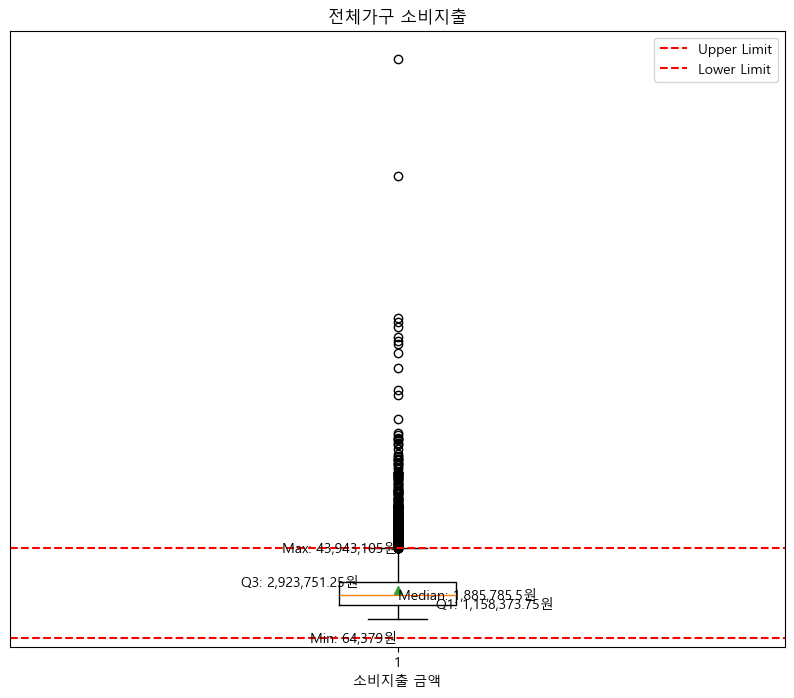

In [19]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(total_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(total_expend, 25)
Q3 = np.percentile(total_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left')  # 오른쪽에 출력
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, np.median(total_expend), f'Median: {np.median(total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')  # 왼쪽에 출력
plt.text(1, lower_limit, f'Min: {np.min(total_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, upper_limit, f'Max: {np.max(total_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력

plt.title('전체가구 소비지출')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")


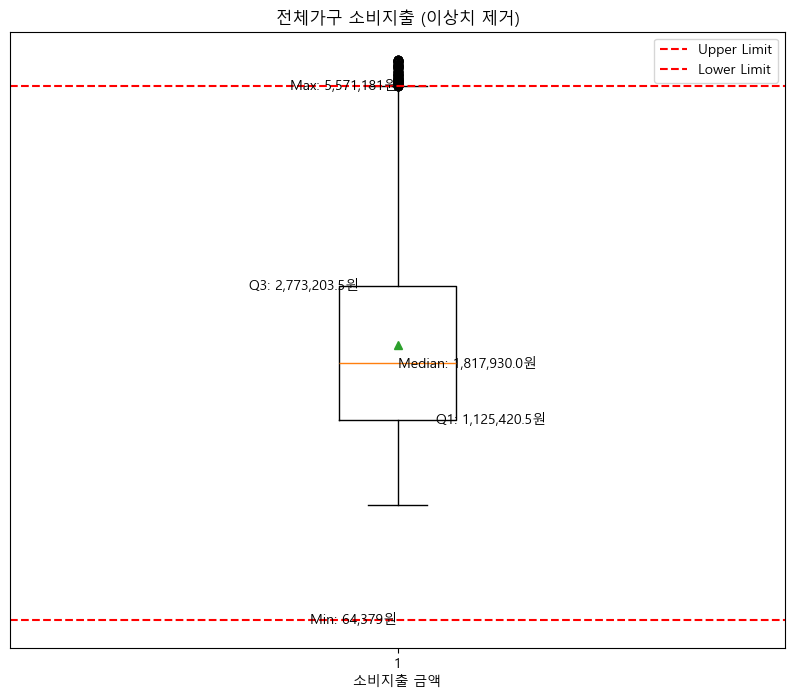

In [20]:
# 이상치 제거
cleaned_total_expend = total_expend[(total_expend >= lower_limit) & (total_expend <= upper_limit)]

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(cleaned_total_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(cleaned_total_expend, 25)
Q3 = np.percentile(cleaned_total_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left') 
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, np.median(cleaned_total_expend), f'Median: {np.median(cleaned_total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')
plt.text(1, lower_limit, f'Min: {np.min(cleaned_total_expend):,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, upper_limit, f'Max: {np.max(cleaned_total_expend):,}원', verticalalignment='center', horizontalalignment='right')  

plt.title('전체가구 소비지출 (이상치 제거)')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()


In [21]:
# 전체가구 평균 소비지출
total_expend_mean = int(total_expend.mean())
print(f"전체가구의 평균 소비지출: {total_expend_mean:,}원")

전체가구의 평균 소비지출: 2,294,545원


1인 가구 소비지출

In [22]:
# 가구원수 1로 설정하여 9510개에서 2827개의 데이터 전처리

single_expend = df.loc[df['가구원수'] == 1, '소비지출']

single_expend.info # 1인가구 소비지출

<bound method Series.info of 0        451464
2       1358773
4       5875488
5       1180308
12       637191
         ...   
9499    2933981
9500    1009745
9501    1292380
9504     694386
9508    1788251
Name: 소비지출, Length: 2827, dtype: int64>

In [23]:
# 1인가구 이상치 식별
(single_expend < lower_limit) & (single_expend > upper_limit)

0       False
2       False
4       False
5       False
12      False
        ...  
9499    False
9500    False
9501    False
9504    False
9508    False
Name: 소비지출, Length: 2827, dtype: bool

-- 2차전처리 --

* 1인가구 소비지출 이상치확인 (2827개중 2665개) <162개 이상치 식별>

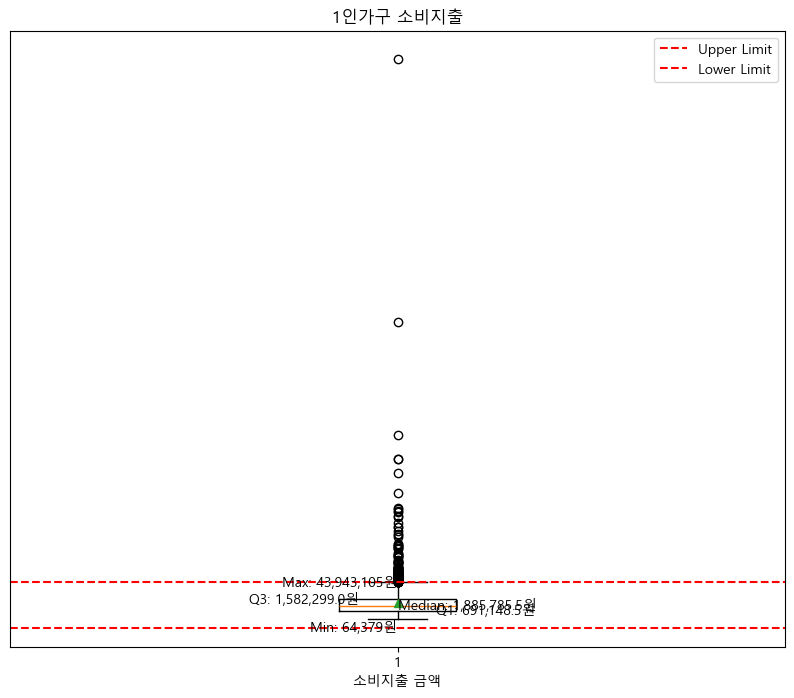

In [24]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(single_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(single_expend, 25)
Q3 = np.percentile(single_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left')  # 오른쪽에 출력
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, np.median(single_expend), f'Median: {np.median(total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')  # 왼쪽에 출력
plt.text(1, lower_limit, f'Min: {np.min(single_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, upper_limit, f'Max: {np.max(single_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력

plt.title('1인가구 소비지출')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")


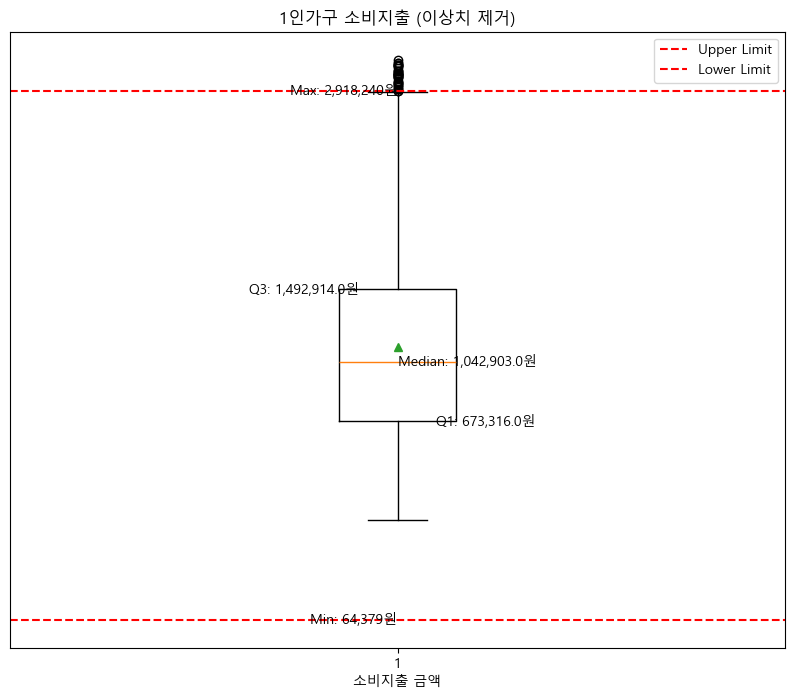

In [25]:
# 이상치 제거
cleaned_single_expend = single_expend[(single_expend >= lower_limit) & (single_expend <= upper_limit)]

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(cleaned_single_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(cleaned_single_expend, 25)
Q3 = np.percentile(cleaned_single_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left') 
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, np.median(cleaned_single_expend), f'Median: {np.median(cleaned_single_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')
plt.text(1, lower_limit, f'Min: {np.min(cleaned_single_expend):,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, upper_limit, f'Max: {np.max(cleaned_single_expend):,}원', verticalalignment='center', horizontalalignment='right')  

plt.title('1인가구 소비지출 (이상치 제거)')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()


In [26]:
# 1인가구 평균 소비지출
single_expend_mean = int(single_expend.mean())
print('-' * 50)
print(f"1인가구의 평균 소비지출: {single_expend_mean:,}원")

--------------------------------------------------
1인가구의 평균 소비지출: 1,307,691원


전체가구 식료품 소비 확인

In [27]:
# 식료품만 확인
columns_groceries = ['식료품음료구입', '식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
                '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', 
                '식료품_유지류구입', '식료품_과일가공품구입', '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', 
                '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입']

df[columns_groceries].head()

,식료품음료구입,식료품_곡물구입,식료품_곡물가공품구입,식료품_빵떡류구입,식료품_육류구입,식료품_육류가공품구입,식료품_신선수산동물구입,식료품_염건수산동물구입,식료품_기타수산동물가공구입,식료품_유제품알구입,식료품_유지류구입,식료품_과일가공품구입,식료품_채소가공품구입,식료품_해조가공품구입,식료품_당류과자류구입,식료품_조미식품구입,식료품_기타식품구입,식료품_커피차구입,식료품_쥬스음료구입
0,153011,0,5553,28736,21273,4350,11770,2683,3267,5822,0,14613,11227,1097,1667,2225,22007,7815,8907
1,300713,47584,22305,11225,39585,0,29298,5550,9597,17945,2663,23780,43547,333,24688,17617,3073,725,1197
2,171247,12314,6879,7169,21694,2764,2214,700,14986,20499,143,25669,17261,143,12510,560,22577,2740,426
3,155088,8554,12763,14940,24717,6094,1811,429,0,6724,679,13820,9394,5393,6646,4003,25284,3630,10207
4,311939,9114,5319,2429,63579,1414,18400,8100,1283,15407,286,63413,56243,1669,20560,10330,7629,25837,929


전체가구 식료품 소비 이상치 확인

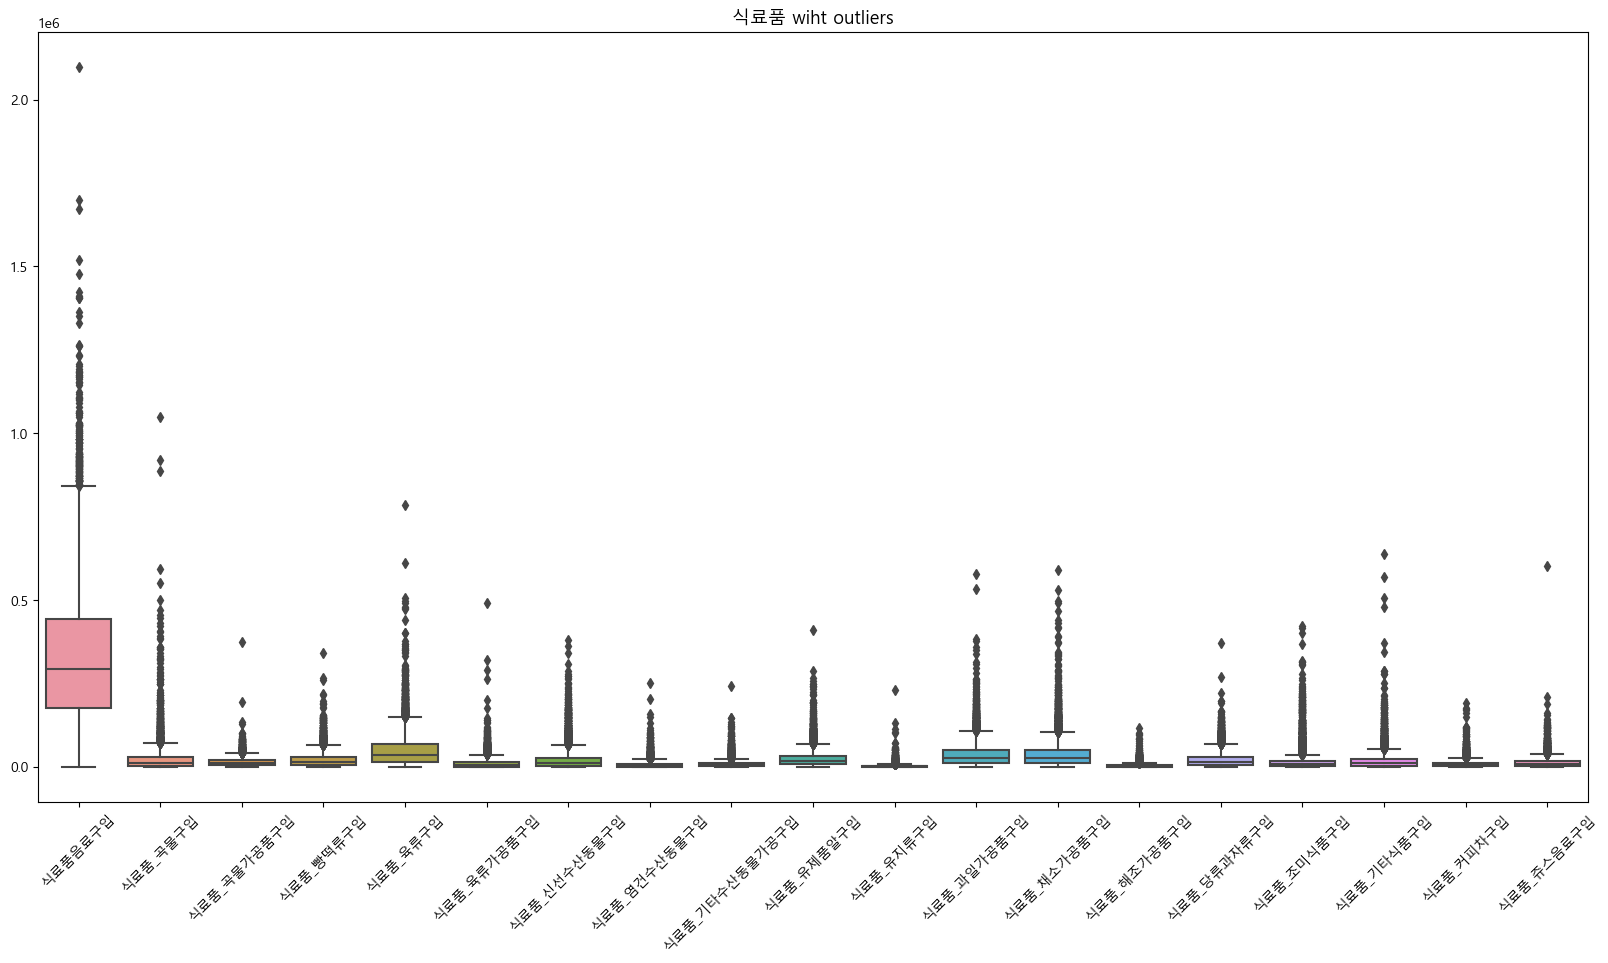

In [28]:
# 'columns_groceries'에 해당하는 컬럼들만 선택하여 Boxplot으로 확인
plt.figure(figsize=(20, 10)) 
sns.boxplot(data=df[columns_groceries])
plt.xticks(rotation=45)
plt.title('식료품 wiht outliers', size='13')
plt.show()


전체가구 식료품 소비 이상치 제거 후 시각화

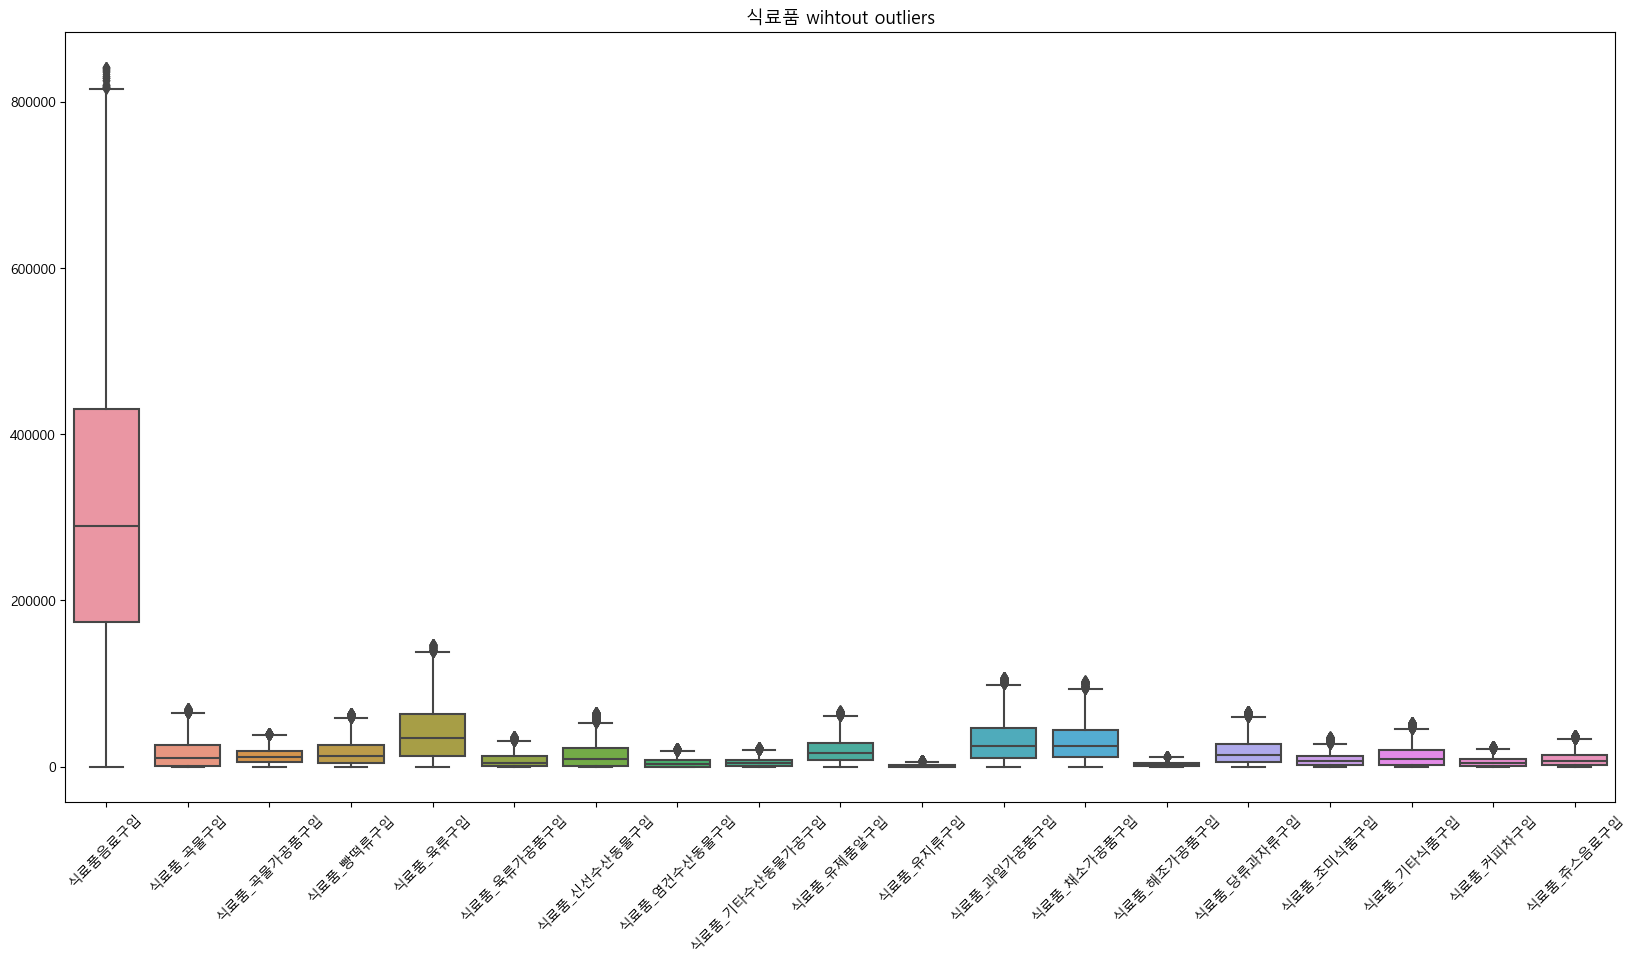

In [29]:
df_without_outliers = df[columns_groceries].copy()

for column in columns_groceries:
    Q1 = df_without_outliers[column].quantile(0.25)
    Q3 = df_without_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # inclusive='both'를 사용하여 양쪽 경계 포함 설정
    mask = df_without_outliers[column].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, inclusive='both')
    df_without_outliers.loc[~mask, column] = None

# 이상치가 제거된 데이터로 Boxplot 확인
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_without_outliers)
plt.xticks(rotation=45)
plt.title('식료품 wihtout outliers',size='13')
plt.show()


식료품 각 항목 총합

In [30]:
# DataFrame에서 각 식료품 항목의 총합 계산
total_groceries = df[columns_groceries].sum()

# 총합을 DataFrame으로 변환
df_tot_groceries = pd.DataFrame(total_groceries, columns=["총합계"]).reset_index()

# 'index' 컬럼명을 '항목명'으로 변경
df_tot_groceries.columns = ['항목명', '총합계']

# 결과 확인
pd.DataFrame(df_tot_groceries)

,항목명,총합계
0,식료품음료구입,3139852760
1,식료품_곡물구입,204252327
2,식료품_곡물가공품구입,139699123
3,식료품_빵떡류구입,195931926
4,식료품_육류구입,455411085
5,식료품_육류가공품구입,101932054
6,식료품_신선수산동물구입,200980717
7,식료품_염건수산동물구입,64639819
8,식료품_기타수산동물가공구입,73446689
9,식료품_유제품알구입,228922068


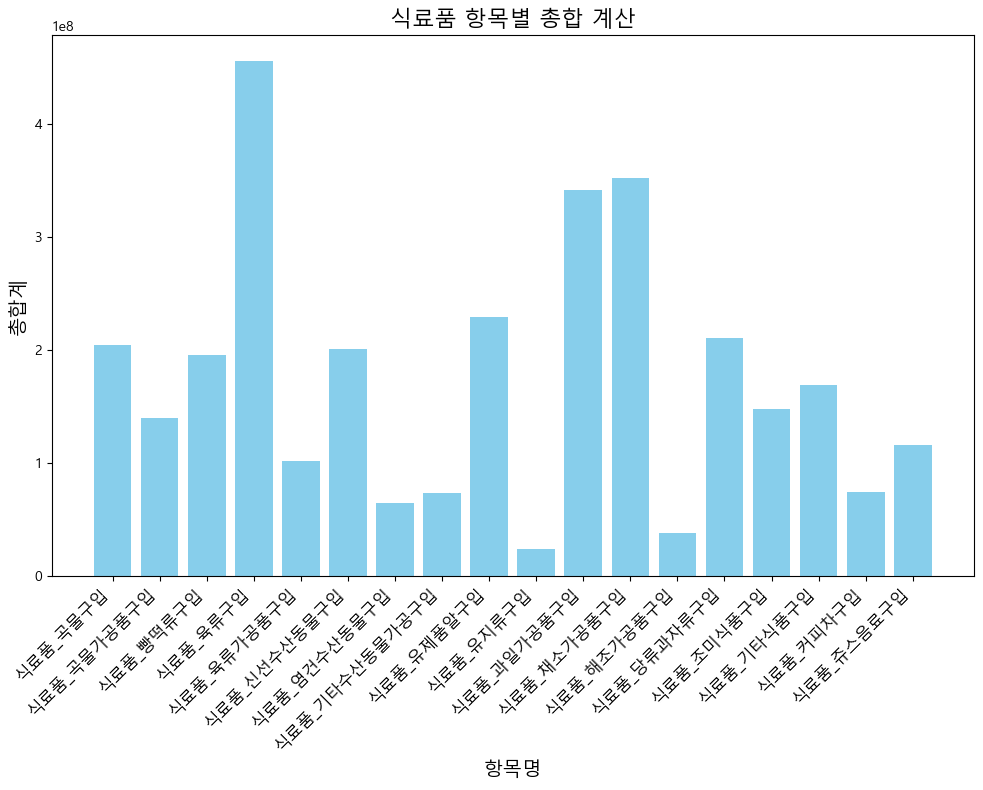

In [32]:
# '식료품음료구입' 항목 제거
# '식료품음료구입' = 식료품 소비지출 합계 항목이라 항목별에서는 제외함
tot_groceries_filtered = df_tot_groceries[df_tot_groceries['항목명'] != '식료품음료구입']

# 막대 그래프 그리기
plt.figure(figsize=(10, 8)) # 그래프의 크기 설정
plt.bar(tot_groceries_filtered['항목명'], tot_groceries_filtered['총합계'], color='skyblue') # 막대 그래프를 그림
plt.xlabel('항목명', fontsize=14) # x축 레이블
plt.ylabel('총합계', fontsize=14) # y축 레이블
plt.xticks(rotation=45, ha='right', fontsize=12) # x축 레이블을 45도 기울임
plt.title('식료품 항목별 총합 계산', fontsize=16) # 그래프 제목
plt.tight_layout() # 그래프 레이아웃 조정

plt.show()

전체가구 연령대별 누적막대그래프

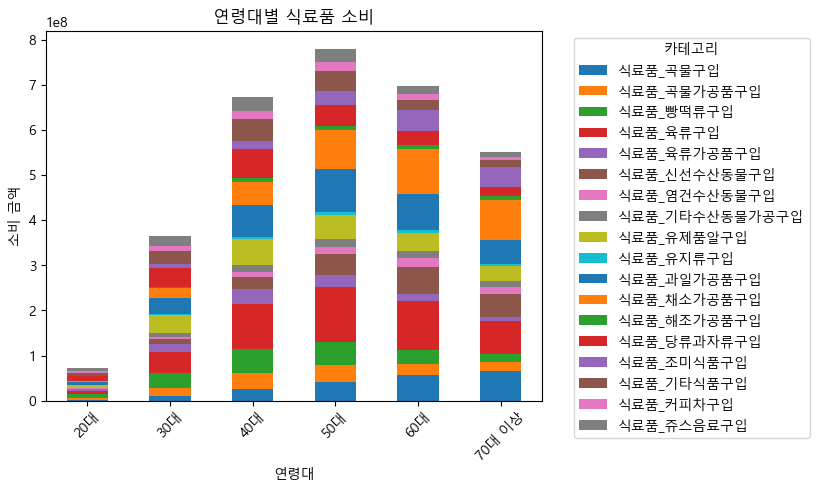

In [33]:
# 연령대별로 식료품 소비 추출
tot_age_groceries = df.groupby('연령대')[['식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
                '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', 
                '식료품_유지류구입', '식료품_과일가공품구입', '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', 
                '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입']].sum()

# 바 그래프 그리기
tot_age_groceries.plot(kind='bar', stacked=True)
plt.title('연령대별 식료품 소비')
plt.xlabel('연령대')
plt.ylabel('소비 금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


1인 가구 연령대별 식료품 누적막대그래프

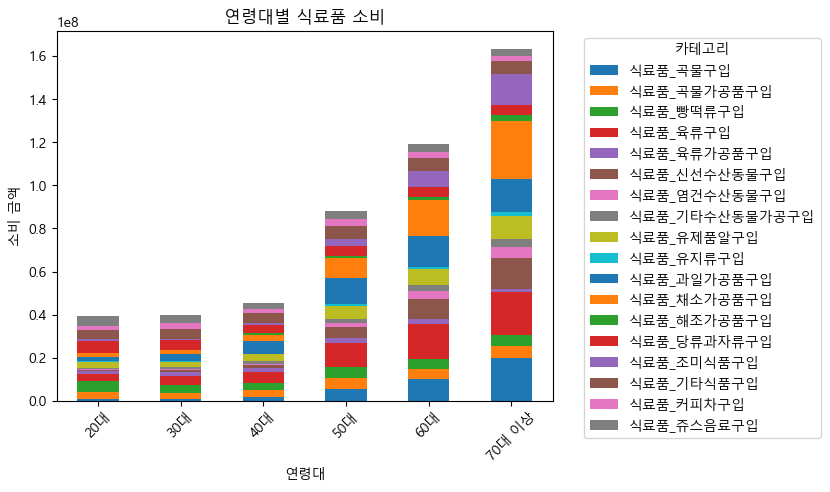

In [34]:
# 연령대별로 식료품 소비 추출
tot_age_groceries = df[df['가구원수']==1].groupby('연령대')[['식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
                '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', 
                '식료품_유지류구입', '식료품_과일가공품구입', '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', 
                '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입']].sum()

# 바 그래프 그리기
tot_age_groceries.plot(kind='bar', stacked=True)
plt.title('연령대별 식료품 소비')
plt.xlabel('연령대')
plt.ylabel('소비 금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


전체가구 평균 소비 중 식료품 비율과 1인 가구 평균 소비 중 식료품 비율

In [35]:
# 전체가구 평균 소비 비용, 비율 
tot_식료품음료구입 = df['식료품음료구입']
tot_식료품음료구입_mean = int(tot_식료품음료구입.mean())
tot_식료품음료구입_per = (tot_식료품음료구입_mean / total_expend_mean) * 100  # 전체가구 소비 중 식료품음료구입 소비 비율

print(tot_식료품음료구입)
print(tot_식료품음료구입_mean)
print(tot_식료품음료구입_per)

0       153011
1       300713
2       171247
3       155088
4       311939
         ...  
9505    689222
9506    657277
9507    623311
9508    270455
9509    343307
Name: 식료품음료구입, Length: 9510, dtype: int64
330163
14.389040092916025


In [37]:
# 1인 가구 평균 소비 비융, 비율
sin_tot_식료품음료구입 = df.loc[df['가구원수'] == 1, '식료품음료구입']
sin_tot_식료품음료구입_mean = int(sin_tot_식료품음료구입.mean())
sin_tot_식료품음료구입_per = (sin_tot_식료품음료구입_mean / single_expend_mean) * 100  # 1인가구 소비 중 식료품음료구입 소비 비율

print(sin_tot_식료품음료구입)
print(sin_tot_식료품음료구입_mean)
print(sin_tot_식료품음료구입_per)

0       153011
2       171247
4       311939
5       163525
12      170024
         ...  
9499    147440
9500    129670
9501    185910
9504    135465
9508    270455
Name: 식료품음료구입, Length: 2827, dtype: int64
175818
13.444919327272267


In [38]:
print(f"전체가구 소비 중 식료품음료구입 소비지출, 비율: {tot_식료품음료구입_mean:,}원 ({tot_식료품음료구입_per:.2f}%)")
print(f"1인가구 소비 중 식료품음료구입 소비지출, 비율: {sin_tot_식료품음료구입_mean:,}원 ({sin_tot_식료품음료구입_per:.2f}%)")

전체가구 소비 중 식료품음료구입 소비지출, 비율: 330,163원 (14.39%)
1인가구 소비 중 식료품음료구입 소비지출, 비율: 175,818원 (13.44%)
